#**Oversampling**

Explanation:
Synthetic Dataset Generation: Creates a binary classification dataset with a significant imbalance between classes.
SMOTE Application: Applies SMOTE to the dataset to balance the classes by generating synthetic samples of the minority class.
ADASYN Application: Applies ADASYN, which also generates synthetic samples but focuses more on those minority samples that are harder to learn, potentially leading to a slightly more balanced or even over-balanced situation in favor of the minority class.
Visualization: Plots the original dataset and the results of applying SMOTE and ADASYN, showing the class distributions before and after oversampling.
The visualizations will help you compare how SMOTE and ADASYN differently impact the class distribution, demonstrating their approaches to addressing class imbalance.

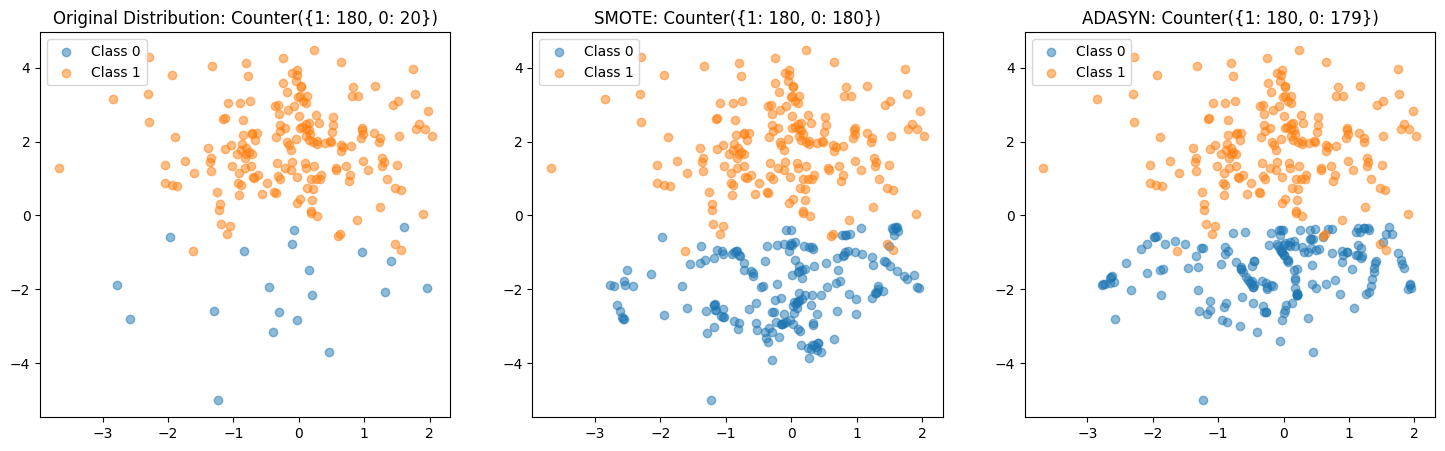

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN

# Generate a synthetic dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=200, random_state=10)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Original dataset
axs[0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", alpha=0.5)
axs[0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", alpha=0.5)
axs[0].set_title(f'Original Distribution: {Counter(y)}')
axs[0].legend()

# SMOTE
axs[1].scatter(X_smote[y_smote == 0][:, 0], X_smote[y_smote == 0][:, 1], label="Class 0", alpha=0.5)
axs[1].scatter(X_smote[y_smote == 1][:, 0], X_smote[y_smote == 1][:, 1], label="Class 1", alpha=0.5)
axs[1].set_title(f'SMOTE: {Counter(y_smote)}')
axs[1].legend()

# ADASYN
axs[2].scatter(X_adasyn[y_adasyn == 0][:, 0], X_adasyn[y_adasyn == 0][:, 1], label="Class 0", alpha=0.5)
axs[2].scatter(X_adasyn[y_adasyn == 1][:, 0], X_adasyn[y_adasyn == 1][:, 1], label="Class 1", alpha=0.5)
axs[2].set_title(f'ADASYN: {Counter(y_adasyn)}')
axs[2].legend()

plt.show()
